In [94]:
import pandas as pd
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'lines.linewidth': 1, 'axes.labelsize': 12, 'axes.titlesize': 12})
sns.set_theme(style='whitegrid')
sns.set_context("notebook", rc={"lines.linewidth": 0.7})

palette = ["#e36414", "#588157", "#669bbc", "#ba181b"]

In [95]:
results = Path("./slurm/results")
# results = Path("./results")

def save(figure, name):
    figure.savefig(str(name) + ".svg", dpi=65, bbox_inches="tight")
    figure.savefig(str(name) + ".pgf", dpi=65, bbox_inches="tight")
    figure.clf()

In [96]:
sylvan_cudd_runtime = pd.read_csv(results / 'sylvan_cudd_runtime.csv')
sylvan_cudd_quality = pd.read_csv(results / 'sylvan_cudd_quality.csv')

In [97]:
sylvan_cudd_runtime.head()
# sylvan_cudd_quality.head()

,command,mean,stddev,median,user,system,min,max,heuristic,model,reordering_trigger,solver
0,./cudd-solver --rt=a --h=sift ./models/add18y...,0.070427,0.002971,0.071830,0.061394,0.009030,0.065476,0.073264,sift,add18y.aag,a,cudd
1,./cudd-solver --rt=a --h=group ./models/add18...,0.034702,0.001290,0.034658,0.026298,0.008414,0.032446,0.036656,group,add18y.aag,a,cudd
2,./sylvan-solver -n 8 --nt 1 --tr 2 --ts 21 --m...,1.045833,0.015232,1.052314,8.055488,0.202191,1.016005,1.059145,sift,add20y.aag,sa,sylvan -n 8 --nt 1 --tr 2 --ts 21 --mg 1.15 --...
3,./cudd-solver --h=sift --rt=sa ./models/add20y...,0.060972,0.002664,0.061583,0.051981,0.009117,0.056611,0.064234,sift,add20y.aag,sa,cudd --h=sift
4,./cudd-solver --h=group --rt=sa ./models/add20...,0.041521,0.001964,0.041780,0.032055,0.009591,0.037217,0.043529,group,add20y.aag,sa,cudd --h=group


In [98]:
df = sylvan_cudd_quality
df = df.drop('workers', axis=1)
df = df.drop('nodes_threshold', axis=1)
df = df.drop('max_growth', axis=1)
df = df.drop('max_var', axis=1)
df = df.drop('max_swap', axis=1)

def derive_solver_type(row):
    if str(row["solver"]).__contains__("sylvan"):
        return "sylvan-sift"
    elif str(row["solver"]).__contains__("cudd"):
        if str(row["heuristic"]).__contains__("sift"):
            return "cudd-sift"
        elif str(row["heuristic"]).__contains__("group"):
            return "cudd-group"
    else:
        return "NaN"
        
df['Solver'] = df.apply(derive_solver_type, axis=1)
m = df[df["reordering_trigger"] == "m"]


m_add = m[m["model"].str.contains('add', na = False)]
m_mult = m[m["model"].str.contains('mult', na = False)]

m_add = m_add.sort_values(by=['Solver'])
m_mult = m_mult.sort_values(by=['Solver'])



/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/80994621.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.lineplot(ax=ax,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/80994621.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.lineplot(ax=ax,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/80994621.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.lineplot(ax=ax,
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/80994621.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.lineplot(ax=ax,


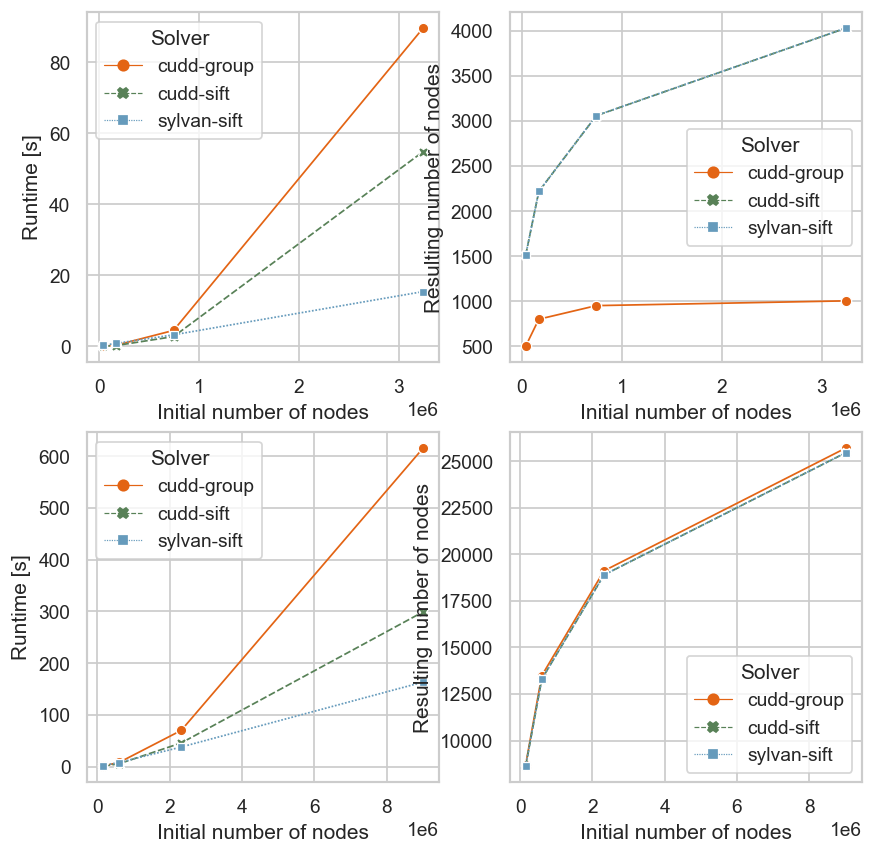

In [99]:
matplotlib.use("TkAgg")
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=125)

def add_line_plot(
    ax, data, 
    x="from_size", y="time", 
    xlabel="Initial number of nodes", ylabel="Runtime [s]", 
    hue="Solver", style="Solver"):
    
    g = sns.lineplot(ax=ax, 
                 x=x, 
                 y=y, 
                 data=data, 
                 hue=hue, 
                 style=style, 
                 markers=True, 
                 dashes=True, 
                 palette=palette,
                 legend="auto",
                 linewidth=1
    )
    ax.set(xlabel=xlabel, ylabel=ylabel)
    return g
    
a = add_line_plot(
    ax=axes[0, 0], 
    y="time", 
    ylabel="Runtime [s]", 
    data=m_add)

b = add_line_plot(
    ax=axes[0, 1], 
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=m_add)

c = add_line_plot(
    ax=axes[1, 0], 
    y="time", 
    ylabel="Runtime [s]", 
    data=m_mult)

d = add_line_plot(
    ax=axes[1, 1], 
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=m_mult)

plt.show()

In [100]:
matplotlib.use("pgf")
plt.figure(figsize=(4,4), dpi=62)

def lineplot(
    data, 
    x="from_size", y="time", 
    xlabel="Given number of nodes", ylabel="Runtime", 
    hue="Solver", style="Solver"):
    
    g = sns.lineplot(
                 x=x, 
                 y=y, 
                 data=data, 
                 hue=hue, 
                 style=style, 
                 markers=True, 
                 dashes=True, 
                 palette=palette,
                 legend="auto",
                 linewidth=1
    )
    g.set(xlabel=xlabel, ylabel=ylabel)
    return g


    
lineplot(
    y="time", 
    ylabel="Runtime", 
    data=m_add)
save(plt, results / 'sylvan-cudd-manual-runtime-add')
lineplot(
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=m_add)
save(plt, results / 'sylvan-cudd-manual-quality-add')
lineplot(
    y="time", 
    ylabel="Runtime", 
    data=m_mult)
save(plt, results / 'sylvan-cudd-manual-runtime-mult')
lineplot(
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=m_mult)
save(plt, results / 'sylvan-cudd-manual-quality-mult')

manual_runtime_mult_table = m_mult.drop('reordering_trigger', axis=1)
manual_runtime_add_table = m_add.drop('reordering_trigger', axis=1)

manual_runtime_table = pd.concat([manual_runtime_mult_table, manual_runtime_add_table])
manual_runtime_table = manual_runtime_table.drop('solver', axis=1)
manual_runtime_table = manual_runtime_table.drop('heuristic', axis=1)
manual_runtime_table = manual_runtime_table.rename(columns={
    'from_size': 'Initial Size', 
    'to_size': 'Resulting Size',
    'time': 'Reordering Time [s]',
    'model': 'Model'
}) 

manual_runtime_table['Model'] = manual_runtime_table["Model"].apply(lambda x: f"{x}.aag")

manual_runtime_table = manual_runtime_table.reset_index(drop=True).set_index(['Model'])
manual_runtime_table = manual_runtime_table.sort_values(by=['Model'])

with open(results / 'manual_runtime_table.tex', 'w') as tf:
     tf.write(manual_runtime_table.to_latex())
manual_runtime_table.head()

/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/3284381201.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.lineplot(
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/3284381201.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.lineplot(
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/3284381201.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.lineplot(
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/3284381201.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.lineplot(


,Initial Size,Resulting Size,Reordering Time [s],Solver
Model,,,,
add10y.aag,38133,1510,0.247967,sylvan-sift
add10y.aag,38132,1509,0.030000,cudd-sift
add10y.aag,38132,500,0.040000,cudd-group
add12y.aag,169618,799,0.300000,cudd-group
add12y.aag,169618,2218,0.200000,cudd-sift


In [101]:
runtime = sylvan_cudd_runtime
runtime = runtime.drop('command', axis=1)
runtime = runtime.drop('user', axis=1)
runtime = runtime.drop('system', axis=1)
runtime = runtime[runtime["reordering_trigger"] != "m"]
runtime['solver_type'] = runtime.apply(derive_solver_type, axis=1)
runtime = runtime.sort_values(by=['solver_type'])
runtime = runtime[(runtime["solver_type"] == "sylvan-sift") | ((runtime["reordering_trigger"] == "a") & ( (runtime["solver_type"] == "cudd-sift") | (runtime["solver_type"] == "cudd-group") ))]
runtime = runtime.drop('solver', axis=1)
runtime = runtime.drop('heuristic', axis=1)

auto_runtime = runtime
auto_runtime = auto_runtime.rename(columns={'mean': 'Runtime [s]', 'model': 'Model', 'solver_type': 'Solver'})

auto_runtime.head()

,Runtime [s],stddev,median,min,max,Model,reordering_trigger,Solver
23,0.019833,0.001438,0.019986,0.018080,0.021609,add10y.aag,a,cudd-group
21,0.031079,0.001227,0.031433,0.028372,0.032427,mult_bool_matrix_2_3_3.aag,a,cudd-group
19,0.125999,0.002629,0.126161,0.122164,0.130229,mult_bool_matrix_2_3_6.aag,a,cudd-group
14,0.050232,0.002921,0.049993,0.046148,0.054182,add24y.aag,a,cudd-group
12,0.245396,0.002376,0.244773,0.242659,0.249292,mult_bool_matrix_2_3_7.aag,a,cudd-group


/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/3905224453.py:13: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Library/Frameworks/Python.framewor

<Axes: xlabel='Model', ylabel='Runtime [s]'>

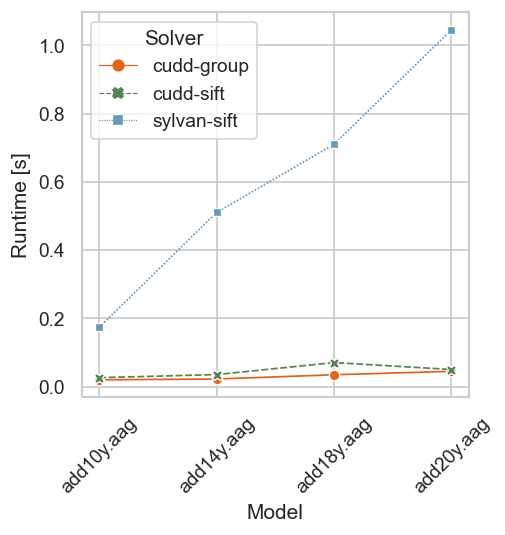

In [102]:
matplotlib.use("TkAgg")
%matplotlib inline

fig, ax = plt.subplots(figsize=(4,4), dpi=125)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

auto_runtime_add = auto_runtime[auto_runtime["Model"].str.contains('add', na = False)]
auto_runtime_add = auto_runtime_add.sort_values(by=['Model'])
auto_runtime_add = auto_runtime_add[auto_runtime_add["Model"] != "add24y.aag"]

sns.lineplot(
    data=auto_runtime_add, 
    x="Model", 
    y="Runtime [s]", 
    hue="Solver",
    hue_order=["cudd-group","cudd-sift","sylvan-sift"], 
    errorbar='sd',
    palette = palette, 
    err_style='bars',
    style="Solver", 
    markers=True,
    dashes=True,
    linewidth=1
)

In [103]:
matplotlib.use("pgf")
fig, ax = plt.subplots(figsize=(4,4), dpi=125)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

auto_runtime_add = auto_runtime[auto_runtime["Model"].str.contains('add', na = False)]
auto_runtime_add = auto_runtime_add.sort_values(by=['Model'])
auto_runtime_add = auto_runtime_add[auto_runtime_add["Model"] != "add24y.aag"]

sns.lineplot(
    data=auto_runtime_add, 
    x="Model", 
    y="Runtime [s]", 
    hue="Solver",
    hue_order=["cudd-group","cudd-sift","sylvan-sift"], 
    errorbar='sd',
    palette = palette, 
    err_style='bars',
    style="Solver", 
    markers=True,
    dashes=True,
    linewidth=1
)
save(plt, results / 'sylvan-cudd-auto-runtime-add')

/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/1698834433.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Library/Frameworks/Python.framewor

/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/3038468367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_runtime_mult["Model"] = auto_runtime_mult.apply(rename_mult_model, axis=1)
/var/folders/jk/3y1l63bd7_s1v1520g9714yr0000gn/T/ipykernel_92923/3038468367.py:18: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = n

<Axes: xlabel='Model', ylabel='Runtime [s]'>

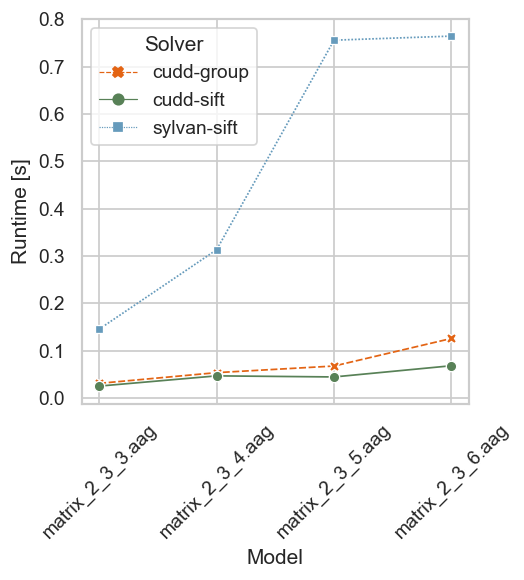

In [104]:
def rename_mult_model(row):
    if str(row["Model"]).__contains__("mult"):
        return str(row["Model"]).split("bool_")[1]
    else:
        return row["Model"]
    
auto_runtime_mult = auto_runtime[auto_runtime["Model"].str.contains('mult', na = False)]
auto_runtime_mult["Model"] = auto_runtime_mult.apply(rename_mult_model, axis=1)
auto_runtime_mult = auto_runtime_mult[auto_runtime_mult["Model"] != "matrix_2_3_7.aag"]
auto_runtime_mult = auto_runtime_mult.sort_values(by=['Runtime [s]'])
df = auto_runtime_mult.sort_values(by='Model', ascending=True)

matplotlib.use("pgf")
fig, ax = plt.subplots(figsize=(4,4), dpi=125)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

sns.lineplot(
    data=df, 
    x="Model", 
    y="Runtime [s]", 
    hue="Solver",
    hue_order=["cudd-group","cudd-sift","sylvan-sift"], 
    errorbar='sd',
    palette = palette, 
    err_style='bars',
    style="Solver", 
    markers=True,
    dashes=True,
    linewidth=1
)

save(plt, results / 'sylvan-cudd-auto-runtime-mult')

matplotlib.use("TkAgg")
%matplotlib inline
fig, ax = plt.subplots(figsize=(4,4),dpi=125)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

sns.lineplot(
    data=df, 
    x="Model", 
    y="Runtime [s]", 
    hue="Solver",
    hue_order=["cudd-group","cudd-sift","sylvan-sift"], 
    errorbar='sd',
    palette = palette, 
    err_style='bars',
    style="Solver", 
    markers=True,
    dashes=True,
    linewidth=1
)



In [105]:
auto_runtime_mult_table = auto_runtime_mult.drop('reordering_trigger', axis=1)
auto_runtime_mult_table = auto_runtime_mult_table.drop('Runtime [s]', axis=1)

auto_runtime_add_table = auto_runtime_add.drop('reordering_trigger', axis=1)
auto_runtime_add_table = auto_runtime_add_table.drop('Runtime [s]', axis=1)

auto_runtime_table = pd.concat([auto_runtime_add_table, auto_runtime_mult_table])
auto_runtime_table['Model'] = auto_runtime_table["Model"].apply(lambda x: f"mult_bool_{x}" if x.__contains__("matrix")  else x)

auto_runtime_table = auto_runtime_table.reset_index(drop=True).set_index(['Model'])
auto_runtime_table = auto_runtime_table.sort_values(by=['Model'])

with open(results / 'auto_runtime_table.tex', 'w') as tf:
    tf.write(auto_runtime_table.style.to_latex(convert_css=True))
    
auto_runtime_table.head(10)

,stddev,median,min,max,Solver
Model,,,,,
add10y.aag,0.001438,0.019986,0.018080,0.021609,cudd-group
add10y.aag,0.001397,0.026103,0.023695,0.027994,cudd-sift
add10y.aag,0.004455,0.172905,0.168463,0.182778,sylvan-sift
add14y.aag,0.001190,0.022621,0.020128,0.023856,cudd-group
add14y.aag,0.001315,0.035290,0.032725,0.037109,cudd-sift
add14y.aag,0.007131,0.510578,0.498666,0.522277,sylvan-sift
add18y.aag,0.001290,0.034658,0.032446,0.036656,cudd-group
add18y.aag,0.002971,0.071830,0.065476,0.073264,cudd-sift
add18y.aag,0.012516,0.710484,0.692769,0.729251,sylvan-sift
